**References**
*  https://www.kaggle.com/code/mukeshmanral/advance-linear-regression-gridsearchcv-hpt-basic?scriptVersionId=77957379
* https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv-for-regression#mcetoc_1g1frvgll8
* https://scikit-learn.org/stable/modules/model_evaluation.html
* https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/
* https://python-course.eu/machine-learning/introduction-regression-with-python.php

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/NCKH VNICT'
!ls

/content/drive/MyDrive/NCKH VNICT
 Dataset	  DatasetPlaces.gsheet	 Ideas.gdoc	   TASK.gsheet
 Dataset.gsheet   FINAL.ipynb		'Research Paper'   Timeline.gdoc


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Transform 
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# Find best subset and parameters
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge # L2 regularization
from sklearn.linear_model import Lasso # L1 regularization
from sklearn.linear_model import ElasticNet # Combine of L1 and L2 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Ensembles
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

# I. Import and check the dataset 

In [ ]:
# Import datasets
data1 = pd.read_excel('/content/drive/MyDrive/NCKH VNICT/Dataset/Dataset PAM AIR.xlsx', 'Quảng Ninh')
data2 = pd.read_excel('/content/drive/MyDrive/NCKH VNICT/Dataset/Dataset PAM AIR.xlsx', 'Lào Cai')
data3 = pd.read_excel('/content/drive/MyDrive/NCKH VNICT/Dataset/Dataset PAM AIR.xlsx', 'Hà Nội')
data4 = pd.read_excel('/content/drive/MyDrive/NCKH VNICT/Dataset/Dataset PAM AIR.xlsx', 'Quảng Bình')
data5 = pd.read_excel('/content/drive/MyDrive/NCKH VNICT/Dataset/Dataset PAM AIR.xlsx', 'Đà Nẵng')
data6 = pd.read_excel('/content/drive/MyDrive/NCKH VNICT/Dataset/Dataset PAM AIR.xlsx', 'Đắk Lắk')
data7 = pd.read_excel('/content/drive/MyDrive/NCKH VNICT/Dataset/Dataset PAM AIR.xlsx', 'TPHCM')
data8 = pd.read_excel('/content/drive/MyDrive/NCKH VNICT/Dataset/Dataset PAM AIR.xlsx', 'Kiên Giang')
data9 = pd.read_excel('/content/drive/MyDrive/NCKH VNICT/Dataset/Dataset PAM AIR.xlsx', 'Cao Bằng')
data10 = pd.read_excel('/content/drive/MyDrive/NCKH VNICT/Dataset/Dataset PAM AIR.xlsx', 'Cà Mau')

FileNotFoundError: ignored

In [ ]:
# Set the column name
data1.columns = ['Time', 'PM25', 'Humidnity', 'Temperature', 'Rush Hour', 'Hour', 
                'Day', 'Month', 'Year', 'Altitude', 'Airport Distance', 'Airport', 
                'Province', 'Industrial Distance', 'Industrial Zone', 'Place']

data2.columns = ['Time', 'PM25', 'Humidnity', 'Temperature', 'Rush Hour', 'Hour', 
                'Day', 'Month', 'Year', 'Altitude', 'Airport Distance', 'Airport', 
                'Province', 'Industrial Distance', 'Industrial Zone', 'Place']

data3.columns = ['Time', 'PM25', 'Humidnity', 'Temperature', 'Rush Hour', 'Hour', 
                'Day', 'Month', 'Year', 'Altitude', 'Airport Distance', 'Airport', 
                'Province', 'Industrial Distance', 'Industrial Zone', 'Place']

data4.columns = ['Time', 'PM25', 'Humidnity', 'Temperature', 'Rush Hour', 'Hour', 
                'Day', 'Month', 'Year', 'Altitude', 'Airport Distance', 'Airport', 
                'Province', 'Industrial Distance', 'Industrial Zone', 'Place']

data5.columns = ['Time', 'PM25', 'Humidnity', 'Temperature', 'Rush Hour', 'Hour', 
                'Day', 'Month', 'Year', 'Altitude', 'Airport Distance', 'Airport', 
                'Province', 'Industrial Distance', 'Industrial Zone', 'Place']

data6.columns = ['Time', 'PM25', 'Humidnity', 'Temperature', 'Rush Hour', 'Hour', 
                'Day', 'Month', 'Year', 'Altitude', 'Airport Distance', 'Airport', 
                'Province', 'Industrial Distance', 'Industrial Zone', 'Place']

data7.columns = ['Time', 'PM25', 'Humidnity', 'Temperature', 'Rush Hour', 'Hour', 
                'Day', 'Month', 'Year', 'Altitude', 'Airport Distance', 'Airport', 
                'Province', 'Industrial Distance', 'Industrial Zone', 'Place']

data8.columns = ['Time', 'PM25', 'Humidnity', 'Temperature', 'Rush Hour', 'Hour', 
                'Day', 'Month', 'Year', 'Altitude', 'Airport Distance', 'Airport', 
                'Province', 'Industrial Distance', 'Industrial Zone', 'Place']

data9.columns = ['Time', 'PM25', 'Humidnity', 'Temperature', 'Rush Hour', 'Hour', 
                'Day', 'Month', 'Year', 'Altitude', 'Airport Distance', 'Airport', 
                'Province', 'Industrial Distance', 'Industrial Zone', 'Place']

data10.columns = ['Time', 'PM25', 'Humidnity', 'Temperature', 'Rush Hour', 'Hour', 
                'Day', 'Month', 'Year', 'Altitude', 'Airport Distance', 'Airport', 
                'Province', 'Industrial Distance', 'Industrial Zone', 'Place']

In [ ]:
data = pd.concat([data1, data2])

data = pd.concat([data, data3])

data = pd.concat([data, data4])

data = pd.concat([data, data5])

data = pd.concat([data, data6])

data = pd.concat([data, data7])

data = pd.concat([data, data8])

data = pd.concat([data, data9])

data = pd.concat([data, data10])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72384 entries, 0 to 6930
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Time                 72384 non-null  datetime64[ns]
 1   PM25                 71708 non-null  float64       
 2   Humidnity            63788 non-null  float64       
 3   Temperature          67189 non-null  float64       
 4   Rush Hour            72384 non-null  int64         
 5   Hour                 72384 non-null  int64         
 6   Day                  72384 non-null  int64         
 7   Month                72384 non-null  int64         
 8   Year                 72384 non-null  int64         
 9   Altitude             72384 non-null  int64         
 10  Airport Distance     72384 non-null  int64         
 11  Airport              72384 non-null  object        
 12  Province             72384 non-null  object        
 13  Industrial Distance  72384 non-n

In [ ]:
# create excel writer object
writer = pd.ExcelWriter('/content/drive/MyDrive/NCKH VNICT/Dataset/FullDataSet.xlsx')
# write dataframe to excel
data.to_excel(writer)
# save the excel
#writer.save()

In [ ]:
# Understanding Unique value distribution
for i in data.columns:
    #print(i,'\n',data[i].value_counts(),'\n','***'*20,'\n')
    print(f'Column name: [{i}]\n{data[i].value_counts()}\n','***'*20,'\n')

Column name: [Time]
2022-08-04 00:00:00    14
2022-08-13 00:00:00    12
2022-05-22 00:00:00    11
2022-05-26 00:00:00    11
2022-09-07 00:00:00    11
                       ..
2022-05-01 04:00:00     6
2022-05-01 00:00:00     6
2022-07-14 23:00:00     5
2022-05-01 08:00:00     5
2022-05-01 07:00:00     2
Name: Time, Length: 7928, dtype: int64
 ************************************************************ 

Column name: [PM2.5]
2.80     414
3.10     409
2.60     405
2.90     399
2.10     396
        ... 
41.54      1
65.15      1
68.23      1
87.52      1
64.48      1
Name: PM2.5, Length: 7057, dtype: int64
 ************************************************************ 

Column name: [Humidnity]
99.00     8895
75.00     5252
99.99     2753
100.00    2617
99.10      326
          ... 
63.88        1
17.34        1
15.66        1
27.49        1
52.97        1
Name: Humidnity, Length: 4917, dtype: int64
 ************************************************************ 

Column name: [Temperature

# II. Processing the data 

## Convert the alphabetical data into numeric

In [ ]:
# Set name of column 
data.columns = ['The name of column']

In [ ]:
# Change values in ... to ... (Buổi)
data.name_of_the_column = data.name_of_the_column.replace({thing we want to replace: the replace value})

## Check null values


In [ ]:
# Check null values in each column
data.isnull().sum()

Time                      0
PM2.5                   676
Humidnity              8596
Temperature            5195
Rush Hour                 0
Hour                      0
Day                       0
Month                     0
Year                      0
Altitude                  0
Airport Distance          0
Airport                   0
Province                  0
Industrial Distance       0
Industrial Zone           0
Place                     0
dtype: int64

## Detect outliers and influential cases

In [ ]:
# Drop object column
data.drop(['Time', 'Airport', 'Province', 'Industrial Zone', 'Place'], axis='columns', inplace=True)

In [ ]:
data.describe()

,PM2.5,Humidnity,Temperature,Rush Hour,Hour,Day,Month,Year,Altitude,Airport Distance,Industrial Distance
count,71708.000000,63788.000000,67189.000000,72384.000000,72384.000000,72384.000000,72384.000000,72384.000000,72384.000000,72384.000000,72384.000000
mean,15.504482,86.262028,28.332920,11.511522,0.257364,15.694366,6.839509,2022.170051,257.051766,45.797068,32.208402
std,18.019293,13.318634,5.447461,6.928949,0.437184,8.757011,3.370205,0.375681,448.463453,62.677444,93.462809
min,0.000000,9.940000,5.380000,0.000000,0.000000,1.000000,1.000000,2022.000000,0.000000,3.000000,2.000000
25%,4.100000,75.427500,25.500000,6.000000,0.000000,8.000000,4.000000,2022.000000,27.000000,6.000000,3.000000
50%,9.200000,89.525000,28.400000,12.000000,0.000000,16.000000,7.000000,2022.000000,62.000000,19.000000,5.000000
75%,20.230000,99.000000,31.640000,18.000000,1.000000,23.000000,10.000000,2022.000000,309.000000,34.000000,10.000000
max,317.250000,100.000000,46.900000,23.000000,1.000000,31.000000,12.000000,2023.000000,1676.000000,170.000000,363.000000


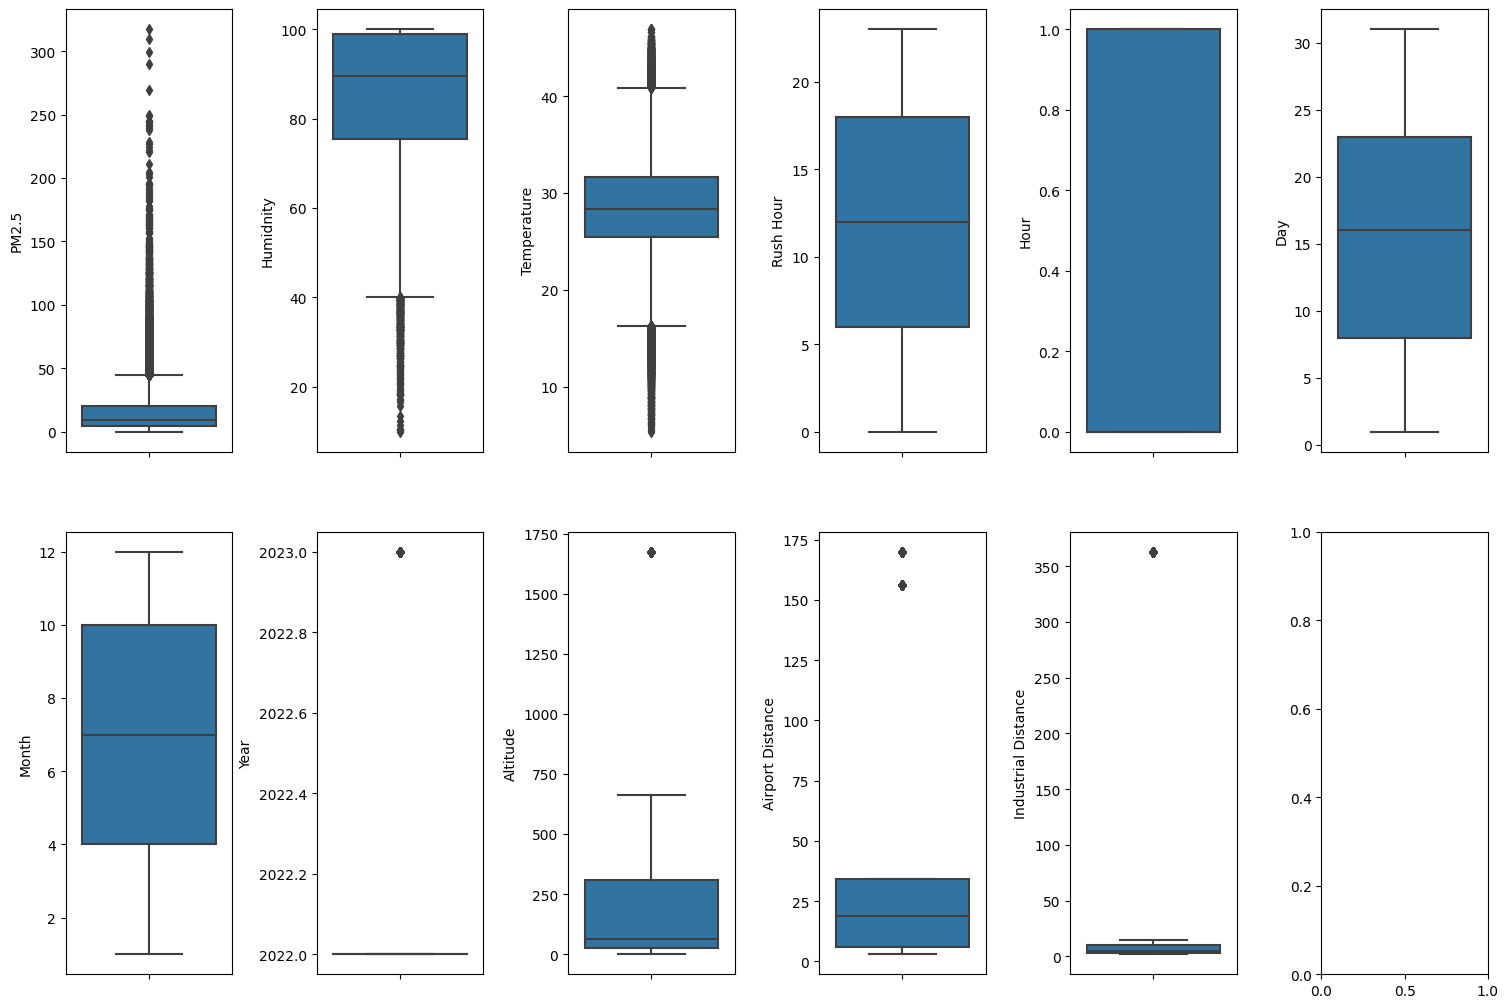

In [ ]:
# Using box plot to detect outlier.
fig, axs = plt.subplots(ncols = 6, nrows = 2, figsize=(15, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Check the percentages of outliers in each column
for k, v in data.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column PM2.5 outliers = 6.59%
Column Humidnity outliers = 0.55%
Column Temperature outliers = 3.48%
Column Rush Hour outliers = 0.00%
Column Hour outliers = 0.00%
Column Day outliers = 0.00%
Column Month outliers = 0.00%
Column Year outliers = 100.00%
Column Altitude outliers = 7.38%
Column Airport Distance outliers = 21.83%
Column Industrial Distance outliers = 7.38%


## Feature Selection

In [ ]:
# Using correlation matrix
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-47-ae935b33474c>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,PM2.5,Humidnity,Temperature,Rush Hour,Hour,Day,Month,Year,Altitude,Airport Distance,Industrial Distance
PM2.5,1.00,-0.18,-0.13,0.00,0.06,0.03,-0.04,0.17,-0.13,0.04,-0.18
Humidnity,-0.18,1.00,-0.38,-0.21,-0.08,0.00,0.04,-0.02,0.10,-0.15,0.16
Temperature,-0.13,-0.38,1.00,0.18,0.06,0.03,0.08,-0.27,-0.31,-0.30,-0.15
Rush Hour,0.00,-0.21,0.18,1.00,0.14,0.00,-0.00,0.00,0.00,-0.00,0.00
Hour,0.06,-0.08,0.06,0.14,1.00,0.00,-0.00,-0.00,0.01,0.04,-0.01
Day,0.03,0.00,0.03,0.00,0.00,1.00,0.01,-0.02,0.01,-0.00,0.01
Month,-0.04,0.04,0.08,-0.00,-0.00,0.01,1.00,-0.72,-0.05,0.01,-0.05
Year,0.17,-0.02,-0.27,0.00,-0.00,-0.02,-0.72,1.00,0.03,-0.00,0.03
Altitude,-0.13,0.10,-0.31,0.00,0.01,0.01,-0.05,0.03,1.00,0.25,0.88
Airport Distance,0.04,-0.15,-0.30,-0.00,0.04,-0.00,0.01,-0.00,0.25,1.00,-0.20


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1134: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_data.insert(0, var, comp_col)


ValueError: ignored

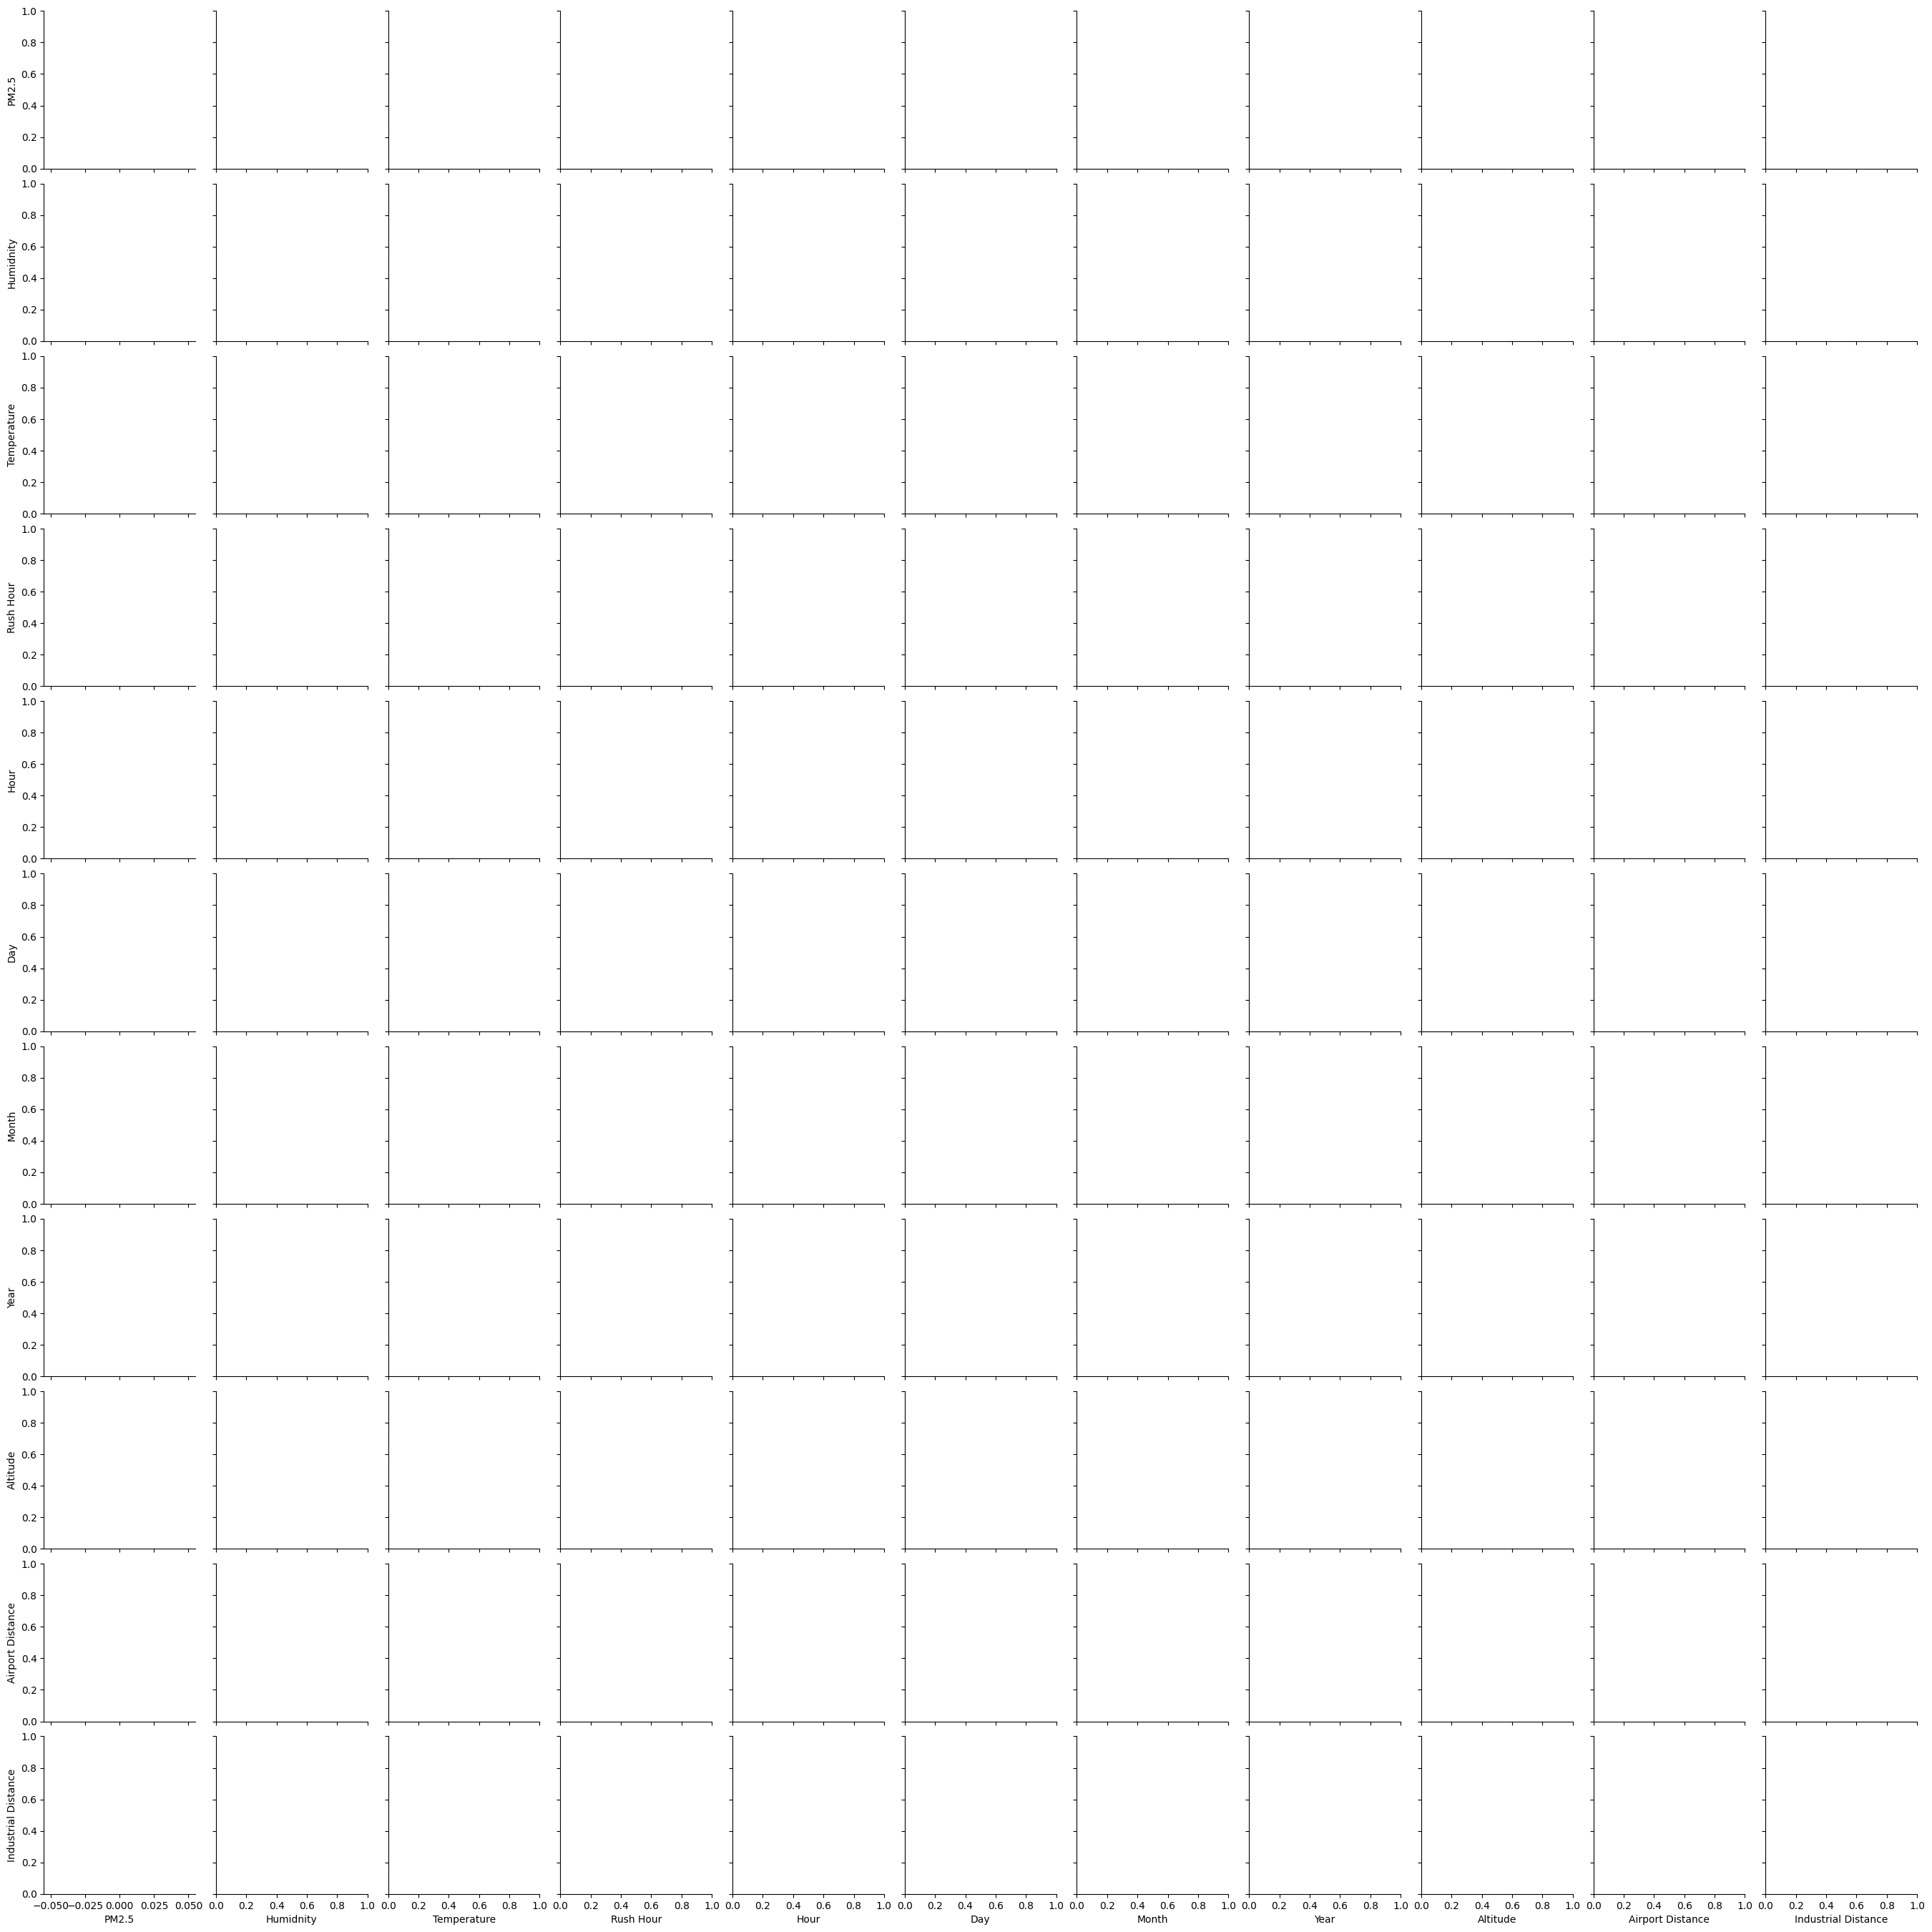

In [ ]:
sns.pairplot(data)

In [ ]:
# Using stepwise regression to find the best subset
model <- lm(y ~ ., data = data)
ols_step_both_p(model)

## Transformation

In [ ]:
# Log transform 
# Performs so well on the right-skewed data. 
transform = FunctionTransformer(func=np.log1p)
transformed_data = transform.fit_transform(data)

In [ ]:
# Square transform
# This transformation mostly applies to left-skewed data
tranformed_data = np.square(data)

In [ ]:
# Square Root transform
# This can be used for reducing the skewness of right-skewed data.
# This transformation is defined only for positive numbers.
tranformed_data = np.sqrt(data)

In [ ]:
# Reciprocal transform
tranformed_data = np.reciprocal(data)

In [ ]:
# Custom transform
sin_tranformed_data = np.sin(data)
cos_tranformed_data = np.cos(data)
tan_tranformed_data = np.tan(data)

In [ ]:
# Boxcox transform
boxcox = PowerTransformer(method='box-cox')
data_transformed = boxcox.fit_transform(data)

# Split the data

In [ ]:
# Split the data into X and Y
array = data.values
X = array[:,0:n]
Y = array[:,n]
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
                                                                test_size=validation_size, 
                                                                random_state=seed)

In [ ]:
# Check the size 
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

# Building models

## OLS 

## Various models

In [ ]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

### Models

In [ ]:
# Import models
models = []
models.append(('LR', LinearRegression()))
models.append(('RIDGE', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

In [ ]:
# Plot the accuracy
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Ensembles

In [ ]:
# Import ensembles
ensembles = []
# boosting
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
# bagging
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

In [ ]:
# Plot the accuracy
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Tunring 

#### Linear Regression

#### Ridge

In [ ]:
# Ridge tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Define our candidate hyperparameters
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 
                        0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 
                        8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
                 
model = Ridge()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, 
                    cv=kfold, return_train_score=True, verbose=1)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Saving GridSearchCV results into a dataframe 
cv_results = pd.DataFrame(grid_result.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha']<=200]

# cv_results head
cv_results.head()

In [ ]:
# Plotting mean train and test scores with alpha
# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

#### Lasso

In [ ]:
# Lasso tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Define our candidate hyperparameters
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 
                        0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 
                        8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
                 
model = Lasso()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, 
                    cv=kfold, return_train_score=True, verbose=1)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Saving GridSearchCV results into a dataframe 
cv_results = pd.DataFrame(grid_result.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha']<=200]

# cv_results head
cv_results.head()

In [ ]:
# Plotting mean train and test scores with alpha
# changing param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper left')

plt.show()

#### Elastic Net

In [ ]:
# Elastic tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Define our candidate hyperparameters
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 
                        0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 
                        8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
                 
model = ElasticNet() 
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, 
                    cv=kfold, return_train_score=True, verbose=1)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Saving model_cv results into a dataframe
cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# cv_results head
cv_results.head()

In [ ]:
# Plotting mean train and test scores with alpha
# change param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper left')

#### Decision Tree

#### KNeighbors 

In [ ]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Define our candidate hyperparameters
param_grid = [{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
                  'weights': ['uniform','distance'],'p':[1,2,5]}
                 
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Saving model_cv results into a dataframe
cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# cv_results head
cv_results.head()

In [ ]:
# Plotting mean train and test scores with alpha
# change param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper left')

#### Random Forest

##### Gradient Boosting

In [ ]:
# Gradient Boosting tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Define our candidate hyperparameters
param_grid = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]}
                 
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Saving model_cv results into a dataframe
cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# cv_results head
cv_results.head()

In [ ]:
# Plotting mean train and test scores with alpha
# change param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper left')

#### Extra Tree

#### Ada Boost

# Testing